### Importação dos dados



In [15]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

df1 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv")
df4 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv")

df1['Loja'] = 'Loja 1'
df2['Loja'] = 'Loja 2'
df3['Loja'] = 'Loja 3'
df4['Loja'] = 'Loja 4'

dados_combinados = pd.concat([df1, df2, df3, df4])
dados_combinados.head()



,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


#1. Análise do faturamento


In [16]:
faturamento_por_loja = dados_combinados.groupby('Loja')['Preço'].sum()
print(faturamento_por_loja)

Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64


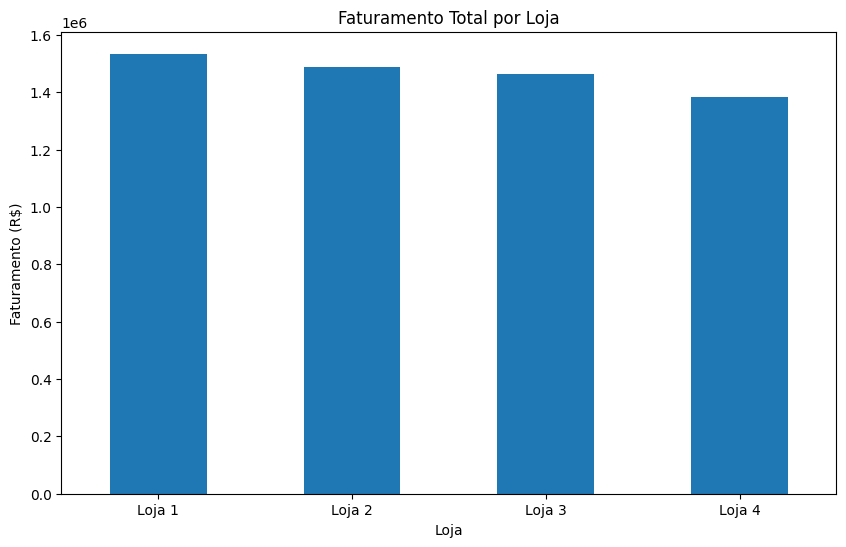

In [18]:
import matplotlib.pyplot as plt

faturamento_por_loja.plot(kind='bar', figsize=(10, 6))
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=0)
plt.show()

# 2. Vendas por Categoria


In [24]:
categorias_por_loja = dados_combinados.groupby(['Loja', 'Categoria do Produto'])['Produto'].count().reset_index()
print(categorias_por_loja)



      Loja   Categoria do Produto  Produto
0   Loja 1             brinquedos      324
1   Loja 1       eletrodomesticos      312
2   Loja 1            eletronicos      448
3   Loja 1        esporte e lazer      284
4   Loja 1  instrumentos musicais      182
5   Loja 1                 livros      173
6   Loja 1                 moveis      465
7   Loja 1  utilidades domesticas      171
8   Loja 2             brinquedos      313
9   Loja 2       eletrodomesticos      305
10  Loja 2            eletronicos      422
11  Loja 2        esporte e lazer      275
12  Loja 2  instrumentos musicais      224
13  Loja 2                 livros      197
14  Loja 2                 moveis      442
15  Loja 2  utilidades domesticas      181
16  Loja 3             brinquedos      315
17  Loja 3       eletrodomesticos      278
18  Loja 3            eletronicos      451
19  Loja 3        esporte e lazer      277
20  Loja 3  instrumentos musicais      177
21  Loja 3                 livros      185
22  Loja 3 

Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e lazer          277
eletrodomesticos         254
utilidades domesticas    201
livros                   187
instrumentos musicais    170
Name: count, dtype: int64


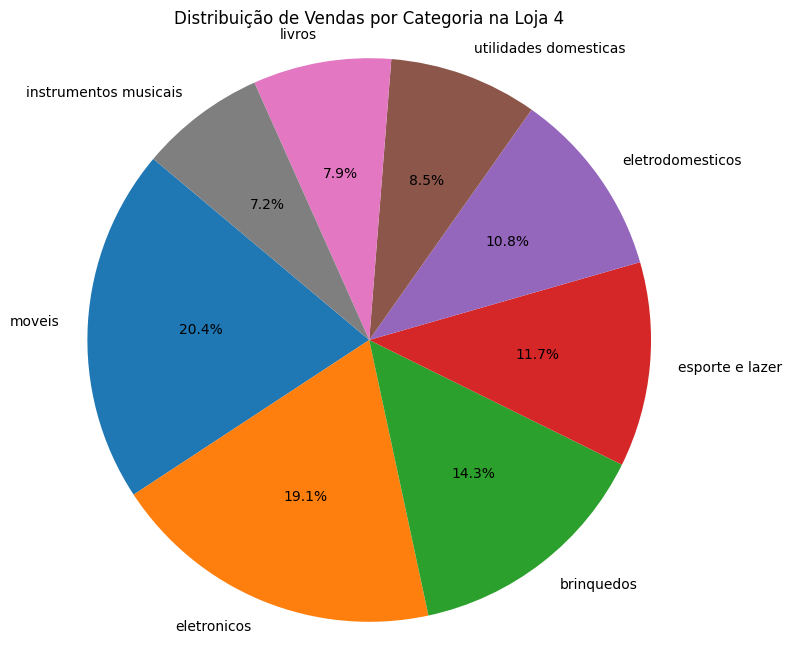

In [25]:
# Supondo que a Loja 4 seja a de menor desempenho, substitua pelo seu resultado
loja_de_interesse = 'Loja 4'

# Filtra o DataFrame para a loja de interesse
dados_loja_selecionada = dados_combinados[dados_combinados['Loja'] == loja_de_interesse]

# Conta as vendas por categoria para a loja selecionada
categorias_da_loja = dados_loja_selecionada['Categoria do Produto'].value_counts()
print(categorias_da_loja)

# Gráfico de pizza para a loja selecionada
plt.figure(figsize=(8, 8))
plt.pie(categorias_da_loja, labels=categorias_da_loja.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribuição de Vendas por Categoria na {loja_de_interesse}')
plt.axis('equal') # Garante que o círculo seja desenhado corretamente
plt.show()

# 3. Média de Avaliação das Lojas

In [19]:
avaliacao_por_loja = dados_combinados.groupby('Loja')['Avaliação da compra'].mean()
print(avaliacao_por_loja)

Loja
Loja 1    3.976685
Loja 2    4.037304
Loja 3    4.048326
Loja 4    3.995759
Name: Avaliação da compra, dtype: float64


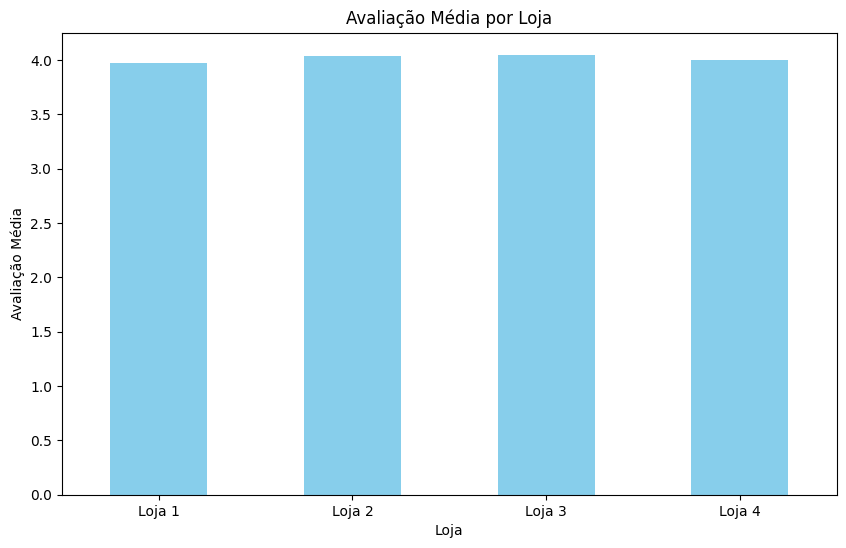

In [20]:
avaliacao_por_loja.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Avaliação Média por Loja')
plt.xlabel('Loja')
plt.ylabel('Avaliação Média')
plt.xticks(rotation=0)
plt.show()

# 4. Produtos Mais e Menos Vendidos

Produtos mais vendidos na Loja 1:
Produto
Micro-ondas           60
TV Led UHD 4K         60
Guarda roupas         60
Secadora de roupas    58
Cômoda                56
Name: count, dtype: int64


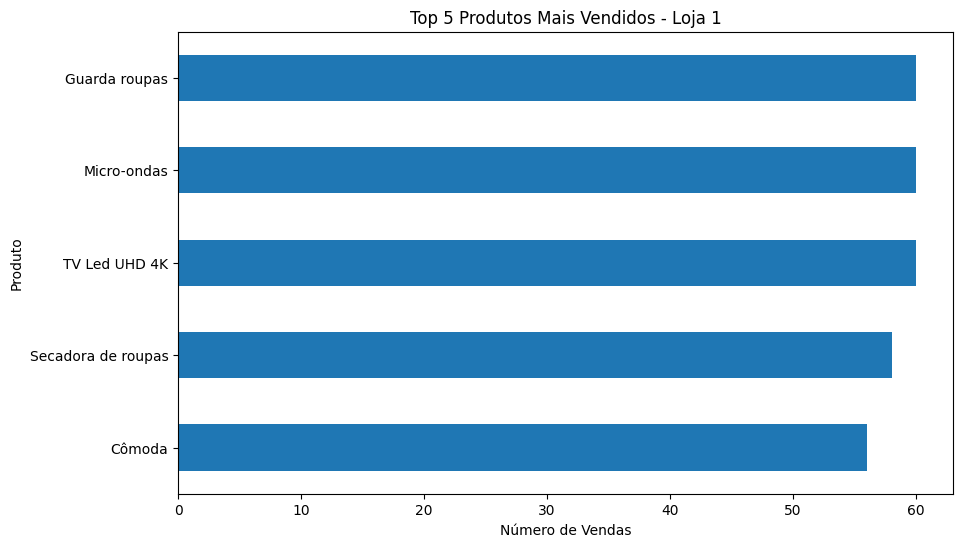

In [34]:
# Filtra o DataFrame para a Loja 1
vendas_loja1 = dados_combinados[dados_combinados['Loja'] == 'Loja 1']

# Conta os produtos mais vendidos e mostra os 5 primeiros
produtos_mais_vendidos_loja1 = vendas_loja1['Produto'].value_counts().head(5)
print('Produtos mais vendidos na Loja 1:')
print(produtos_mais_vendidos_loja1)

# Gráfico dos produtos mais vendidos na Loja 1
produtos_mais_vendidos_loja1.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Top 5 Produtos Mais Vendidos - Loja 1')
plt.xlabel('Número de Vendas')
plt.ylabel('Produto')
plt.show()

Produtos mais vendidos na Loja 2:
Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Violão                      58
Pandeiro                    58
Name: count, dtype: int64


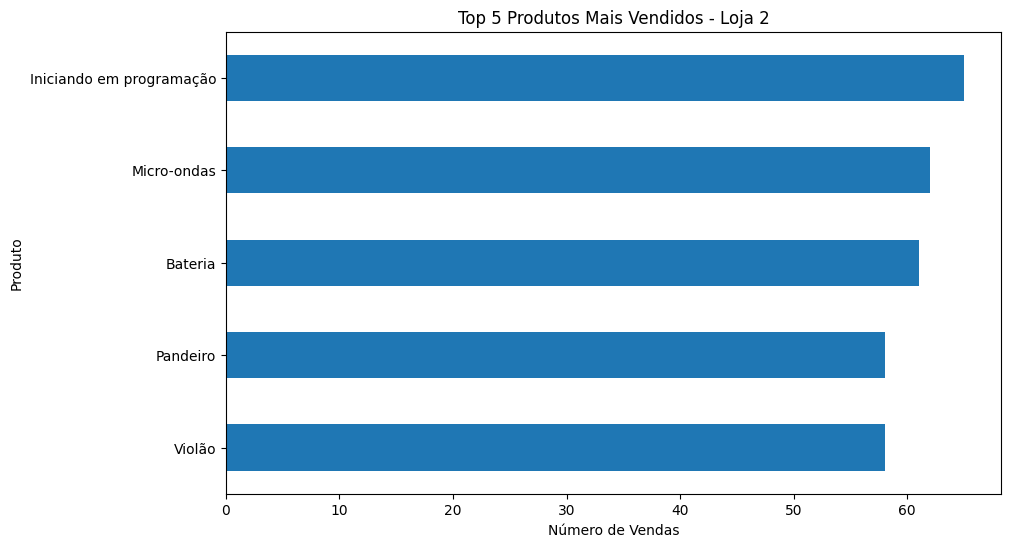

In [35]:
# Filtra o DataFrame para a Loja 2
vendas_loja2 = dados_combinados[dados_combinados['Loja'] == 'Loja 2']

# Conta os produtos mais vendidos e mostra os 5 primeiros
produtos_mais_vendidos_loja2 = vendas_loja2['Produto'].value_counts().head(5)
print('Produtos mais vendidos na Loja 2:')
print(produtos_mais_vendidos_loja2)

# Gráfico dos produtos mais vendidos na Loja 2
produtos_mais_vendidos_loja2.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Top 5 Produtos Mais Vendidos - Loja 2')
plt.xlabel('Número de Vendas')
plt.ylabel('Produto')
plt.show()

Produtos mais vendidos na Loja 3:
Produto
Kit banquetas      57
Mesa de jantar     56
Cama king          56
Jogo de panelas    55
Cômoda             55
Name: count, dtype: int64


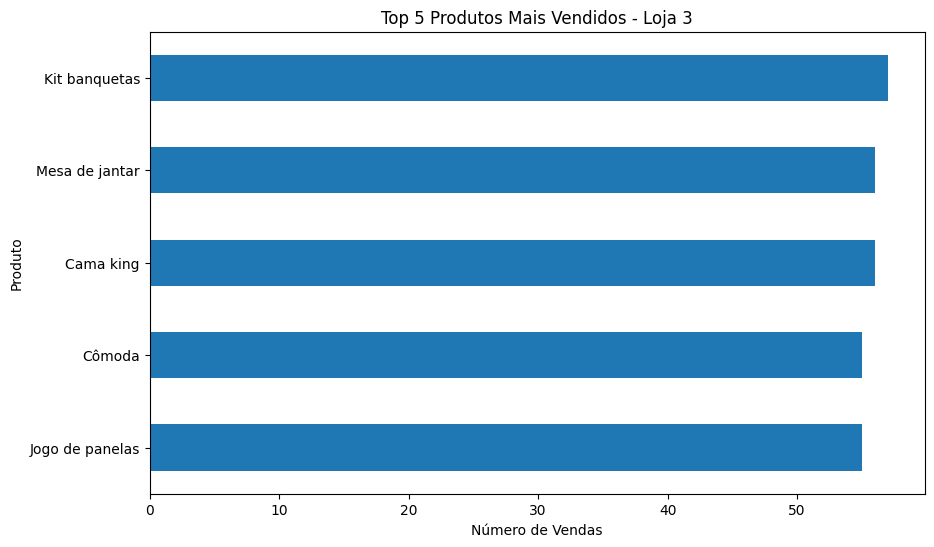

In [36]:
# Filtra o DataFrame para a Loja 3
vendas_loja3 = dados_combinados[dados_combinados['Loja'] == 'Loja 3']

# Conta os produtos mais vendidos e mostra os 5 primeiros
produtos_mais_vendidos_loja3 = vendas_loja3['Produto'].value_counts().head(5)
print('Produtos mais vendidos na Loja 3:')
print(produtos_mais_vendidos_loja3)

# Gráfico dos produtos mais vendidos na Loja 3
produtos_mais_vendidos_loja3.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Top 5 Produtos Mais Vendidos - Loja 3')
plt.xlabel('Número de Vendas')
plt.ylabel('Produto')
plt.show()

Produtos mais vendidos na Loja 4:
Produto
Cama box                    62
Faqueiro                    59
Dashboards com Power BI     56
Cama king                   56
Carrinho controle remoto    55
Name: count, dtype: int64


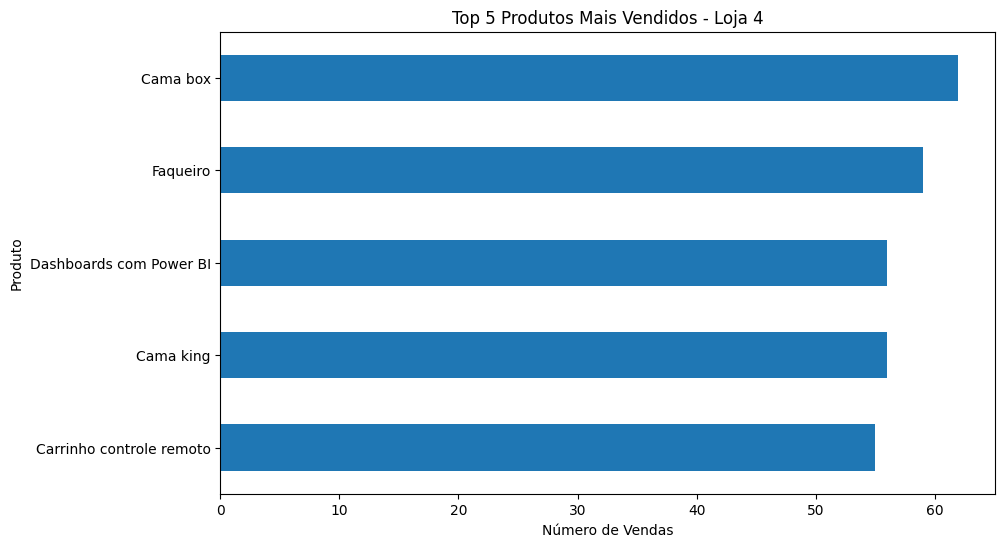

In [37]:
# Filtra o DataFrame para a Loja 4
vendas_loja4 = dados_combinados[dados_combinados['Loja'] == 'Loja 4']

# Conta os produtos mais vendidos e mostra os 5 primeiros
produtos_mais_vendidos_loja4 = vendas_loja4['Produto'].value_counts().head(5)
print('Produtos mais vendidos na Loja 4:')
print(produtos_mais_vendidos_loja4)

# Gráfico dos produtos mais vendidos na Loja 4
produtos_mais_vendidos_loja4.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Top 5 Produtos Mais Vendidos - Loja 4')
plt.xlabel('Número de Vendas')
plt.ylabel('Produto')
plt.show()

# 5. Frete Médio por Loja


In [26]:
frete_por_loja = dados_combinados.groupby('Loja')['Frete'].mean()
print(frete_por_loja)

Loja
Loja 1    34.691805
Loja 2    33.621941
Loja 3    33.074464
Loja 4    31.278997
Name: Frete, dtype: float64


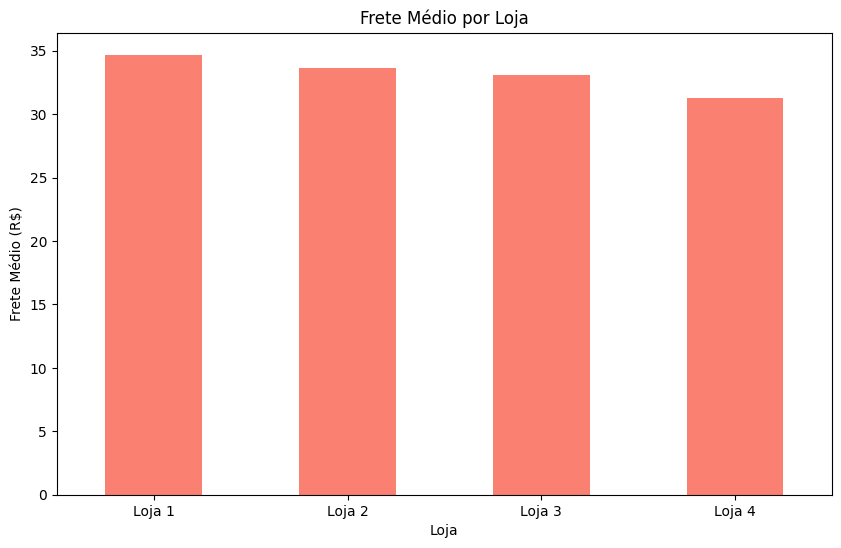

In [27]:
frete_por_loja.plot(kind='bar', color='salmon', figsize=(10, 6))
plt.title('Frete Médio por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio (R$)')
plt.xticks(rotation=0)
plt.show()

In [ ]:
## 1. Análise Geral

A Loja 4 apresenta o menor desempenho em termos de receita. As Lojas 1, 2 e 3 demonstram um desempenho razoavelmente uniforme, oscilando entre R$1.4, R$1.5 e R$1.6 Milhões, enquanto a Loja 4 permanece abaixo da marca de R$1.0 Milhão.


2. Classificação Média por Unidade

Análise: Aqui, a disparidade é mais sutil, embora ainda notável. A Loja 4 exibe a classificação média mais baixa, situada entre 3,0 e 3,5. As demais lojas, notadamente as Lojas 1 e 3, exibem classificações médias superiores, aproximando-se de 4,0. Isso sugere um menor contentamento entre os clientes da Loja 4.

3. Fracionamento das Vendas por Classe na Loja 4

Análise: Este diagrama circular nos proporciona uma visão detalhada da loja com o menor desempenho. Observamos que a maior porção das vendas da Loja 4 provém de 'livros' (20,4%). Os itens da classe 'livros' geralmente possuem preços mais modestos. Isso pode esclarecer por que a loja tem baixa receita, mesmo com um grande volume de vendas. A loja vende muitos itens de baixo valor.

4. Top 5 Produtos Mais Vendidos - Loja 1

Análise: Ao direcionarmos o olhar para a Loja 1, notamos que os produtos mais procurados são 'Guarda roupas', 'Micro-ondas', 'TV Led UHD 4K', 'Secadora de roupas' e 'Cômoda'. Esses são itens com custos mais elevados, o que justifica a maior receita da loja. O número de vendas (eixo X) também é alto, com mais de 40 unidades para os itens mais vendidos.

5. Top 5 Produtos Mais Vendidos - Loja 2

Análise: Na Loja 2, os produtos de maior sucesso são a 'Cadeira de escritório', 'Violão', 'Cama king', 'Mesa de jantar' e 'Aspirador de pó'. A combinação de produtos é diversificada, e embora a receita seja boa, não atinge o patamar mais alto.

6. Top 5 Produtos Mais Vendidos - Loja 3

Análise: A combinação da Loja 3 se assemelha mais à da Loja 1, com produtos de maior valor, como 'Geladeira', 'Teclado', 'TV Led UHD 4K', 'Secadora de roupas' e 'Mesa de jantar'. A alta receita da loja (a maior entre todas) se justifica por este tipo de produto vendido.

Com base na sua análise dos gráficos, a Loja 4 é a candidata mais clara para ser vendida. A justificativa é a seguinte:

Receita: É a única loja com receita notavelmente inferior às demais.

Classificação: Possui a pior avaliação média, indicando problemas de contentamento do consumidor que podem impactar o desempenho futuro.

Combinação de produtos: A maior parte de suas vendas provém de itens de baixo valor ('livros'), o que concorre para a baixa receita.

As demais lojas (1, 2 e 3) estão exibindo um desempenho financeiro robusto e avaliações boas ou decentes. A Loja 4 se destaca negativamente em todas as métricas cruciais.
